In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yfin
import matplotlib_inline.backend_inline 

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')

plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

[*********************100%***********************]  1 of 1 completed


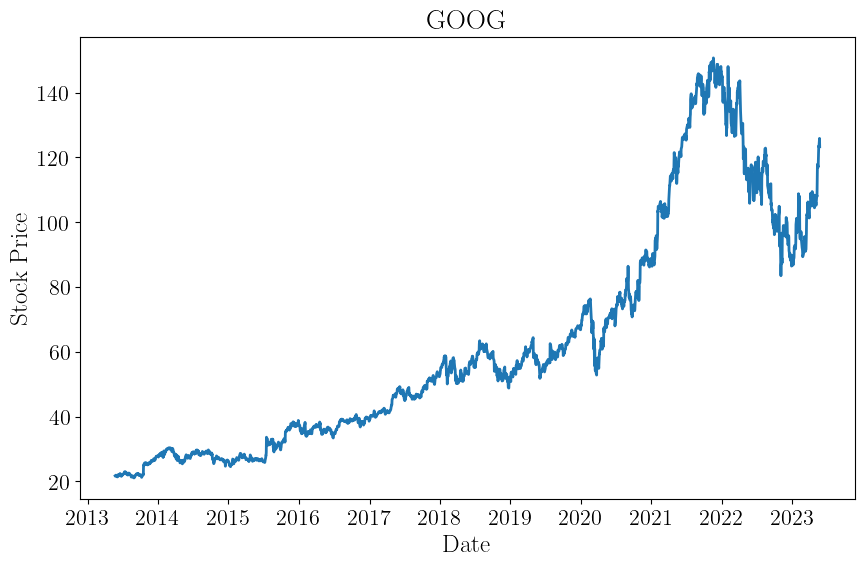

[*********************100%***********************]  1 of 1 completed


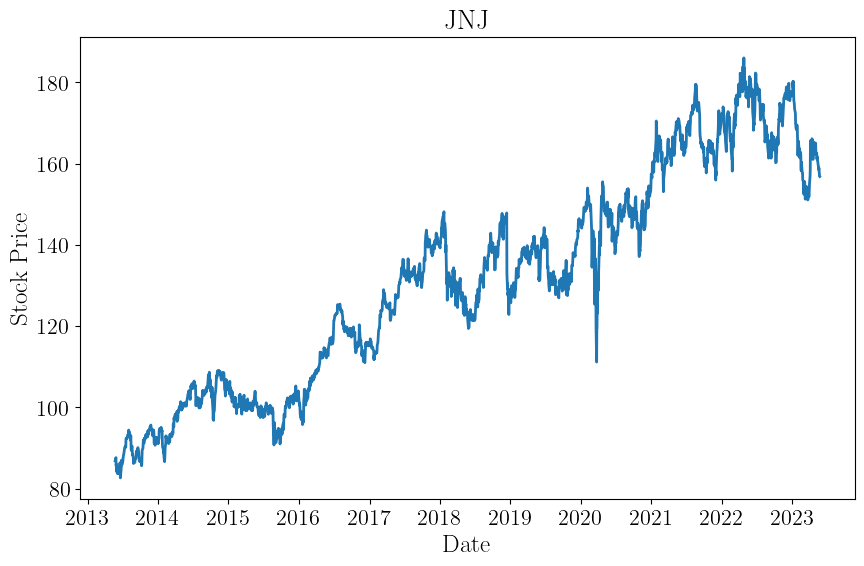

[*********************100%***********************]  1 of 1 completed


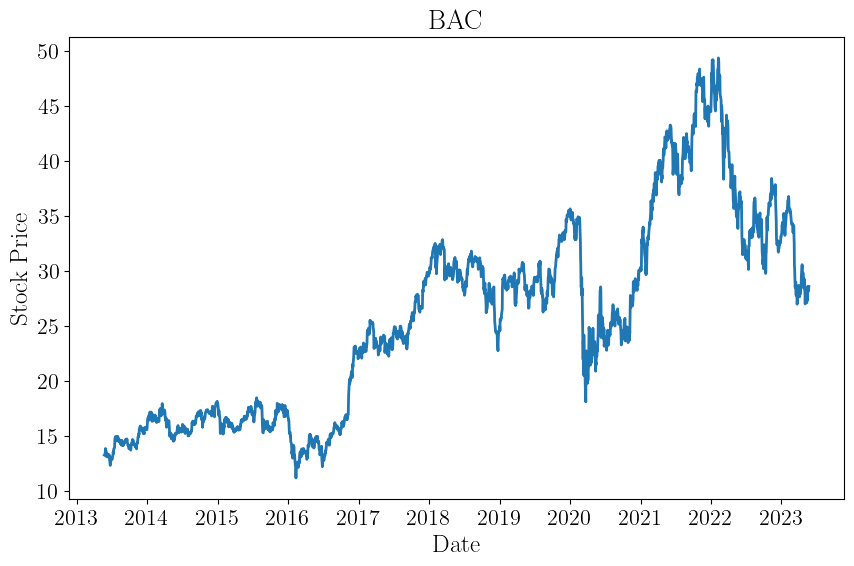

[*********************100%***********************]  1 of 1 completed


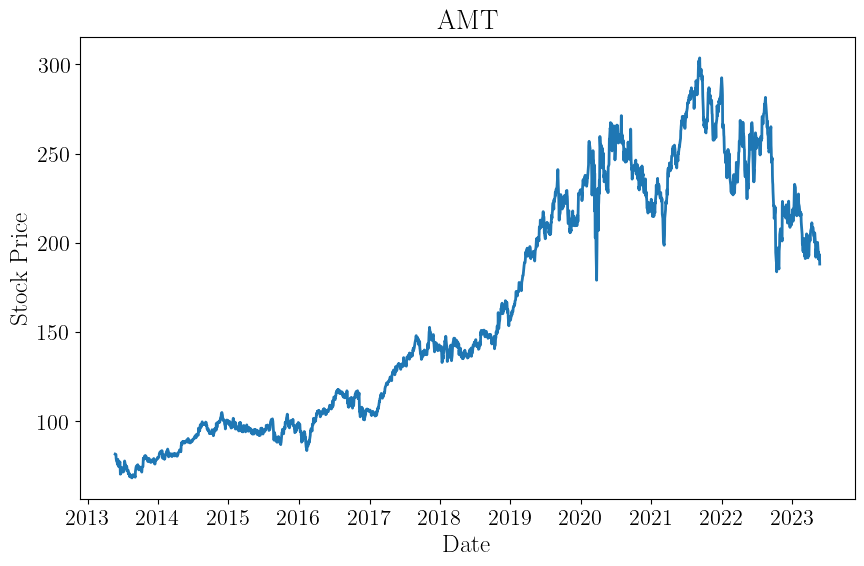

[*********************100%***********************]  1 of 1 completed


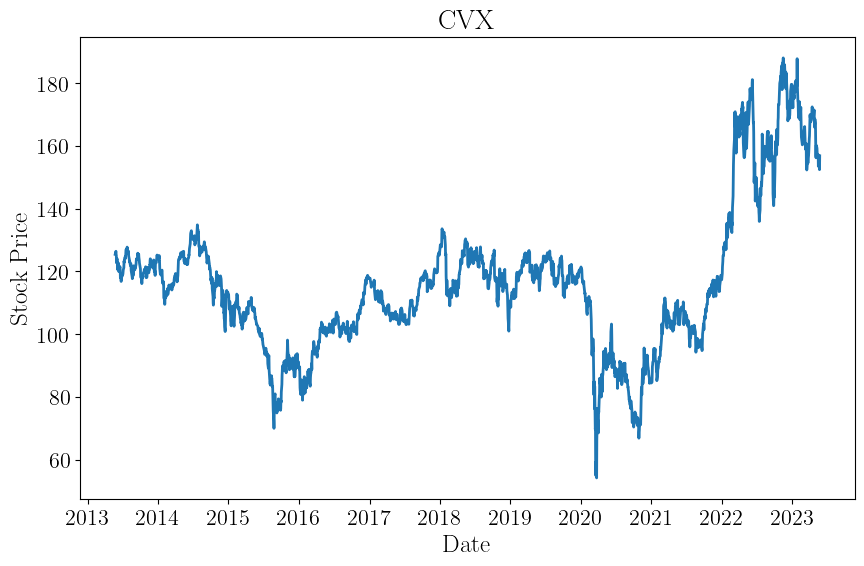

KeyboardInterrupt: 

In [4]:
# 4.3 Time Series

def plot_time_series(ticker):
    data = yfin.download(tickers=ticker, period ='10y', interval='1d')
    close = data['Close']
    price = np.array(close)
    time = []
    for i in range(len(price)):
        time.append(data.index[i])
    plt.plot(time, price)
    plt.title(ticker)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.show()

tickers = ['GOOG', 'JNJ', 'BAC', 'AMT', 'CVX', 'SHW', 'NKE', 'MMM', 'D', 'COST', 'T']

for ticker in tickers:
    plot_time_series(ticker)

In [ ]:
# 4.4 AAPL vs TSLA

def plot_returns_histogram(ticker):
    data = yfin.download(tickers=ticker, period='10y', interval='1d')
    returns = data['Close'].pct_change().fillna(method='bfill')
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    returns.hist(bins=50, ax=ax1, range = (-0.2, 0.2))
    ax1.set_xlabel("Return")
    ax1.set_ylabel("Frequency")
    ax1.set_title(ticker + " Returns")
    plt.show()

tickers = ["AAPL", "TSLA"]

for ticker in tickers:
    plot_returns_histogram(ticker)

In [ ]:
# 4.5 AMZN

def plot_returns_line(ticker):
    data = yfin.download(tickers=ticker, period ='1y', interval='1d')
    returns = data['Close'].pct_change().fillna(method='bfill')
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(returns)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Percent")
    ax1.set_title(ticker + " Returns")
    plt.show()

plot_returns_line('AMZN')

data = yfin.download(tickers='AMZN', period ='10y', interval='1d')
returns = data['Close'].pct_change().fillna(method='bfill')

# print days where Amazon dropped more than 10% in value
for i in range(len(returns)):
    if returns[i] < -0.1 : 
        print(returns[i], data.index[i])

In [ ]:
# 4.6 Rolling Volatility 

tickers = ['AAPL', 'AMZN', 'TSLA', 'JPM']

data = yfin.download(tickers, period ='1y', interval='1d')
returns = data['Close'].pct_change().fillna(method='bfill')
std_dev = returns.rolling(21).std()*(252**0.5)
plt.plot(std_dev, label=returns.columns)
plt.title("3 Week Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

In [ ]:
# 4.7 Rolling Correlation FAANG

aapl = yfin.download(tickers='AAPL', period ='1y', interval='1d')
aapl_returns = aapl['Close'].pct_change().fillna(method='bfill')

amzn = yfin.download(tickers='AMZN', period ='1y', interval='1d')
amzn_returns = amzn['Close'].pct_change().fillna(method='bfill')

meta = yfin.download(tickers='META', period ='1y', interval='1d')
meta_returns = meta['Close'].pct_change().fillna(method='bfill')

nflx = yfin.download(tickers='NFLX', period ='1y', interval='1d')
nflx_returns = nflx['Close'].pct_change().fillna(method='bfill')

tsla = yfin.download(tickers='TSLA', period ='1y', interval='1d')
tsla_returns = tsla['Close'].pct_change().fillna(method='bfill')

corr1 = aapl_returns.rolling(3).corr(amzn_returns)
corr2 = amzn_returns.rolling(3).corr(meta_returns)
corr3 = meta_returns.rolling(3).corr(nflx_returns)
corr4 = nflx_returns.rolling(3).corr(tsla_returns)
corr5 = tsla_returns.rolling(3).corr(aapl_returns)

plt.plot(corr1, label= "AAPL & AMZN")
plt.plot(corr2, label= "AMZN & META")
plt.plot(corr3, label= "META & NFLX")
plt.plot(corr4, label= "NFLX & TSLA")
plt.plot(corr5, label= "TSLA & AAPL")
plt.title("FAANG Rolling Correlation")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()

In [ ]:
# 4.8 Rolling Correlation of Tech and Energy 

# 5 Year Returns

aapl = yfin.download(tickers='AAPL', period ='5y', interval='1wk')
aapl_returns = aapl['Close'].pct_change().fillna(method='bfill')

amzn = yfin.download(tickers='AMZN', period ='5y', interval='1wk')
amzn_returns = amzn['Close'].pct_change().fillna(method='bfill')

meta = yfin.download(tickers='META', period ='5y', interval='1wk')
meta_returns = meta['Close'].pct_change().fillna(method='bfill')

xom = yfin.download(tickers='XOM', period ='5y', interval='1wk')
xom_returns = xom['Close'].pct_change().fillna(method='bfill')

cvx = yfin.download(tickers='CVX', period ='5y', interval='1wk')
cvx_returns = cvx['Close'].pct_change().fillna(method='bfill')

slb = yfin.download(tickers='SLB', period ='5y', interval='1wk')
slb_returns = slb['Close'].pct_change().fillna(method='bfill')

# 2022 Returns

aapl_2022 = yfin.download(tickers='AAPL', start="2022-01-01", end="2022-12-31", interval='1d')
aapl_returns_2022 = aapl_2022['Close'].pct_change().fillna(method='bfill')

amzn_2022 = yfin.download(tickers='AMZN', start="2022-01-01", end="2022-12-31", interval='1d')
amzn_returns_2022 = amzn_2022['Close'].pct_change().fillna(method='bfill')

meta_2022 = yfin.download(tickers='META', start="2022-01-01", end="2022-12-31", interval='1d')
meta_returns_2022 = meta_2022['Close'].pct_change().fillna(method='bfill')

xom_2022 = yfin.download(tickers='XOM', start="2022-01-01", end="2022-12-31", interval='1d')
xom_returns_2022 = xom_2022['Close'].pct_change().fillna(method='bfill')

cvx_2022 = yfin.download(tickers='CVX', start="2022-01-01", end="2022-12-31", interval='1d')
cvx_returns_2022 = cvx_2022['Close'].pct_change().fillna(method='bfill')

slb_2022 = yfin.download(tickers='SLB', start="2022-01-01", end="2022-12-31", interval='1d')
slb_returns_2022 = slb_2022['Close'].pct_change().fillna(method='bfill')

# Plot Correlations
corr1 = aapl_returns.rolling(3).corr(xom_returns)
corr2 = amzn_returns.rolling(3).corr(cvx_returns)
corr3 = meta_returns.rolling(3).corr(slb_returns)

corr4 = aapl_returns_2022.rolling(3).corr(xom_returns_2022)
corr5 = amzn_returns_2022.rolling(3).corr(cvx_returns_2022)
corr6 = meta_returns_2022.rolling(3).corr(slb_returns_2022)

plt.plot(corr1, label= "AAPL & XOM")
plt.plot(corr2, label= "AMZN & CVX")
plt.plot(corr3, label= "META & SLB")
plt.title("Tech vs Energy Rolling Correlation")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()

plt.plot(corr4, label= "AAPL & XOM 2022")
plt.plot(corr5, label= "AMZN & CVX 2022")
plt.plot(corr6, label= "META & SLB 2022")
plt.title("Tech vs Energy 2022 Rolling Correlation")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()